In [1]:
from keras.models import load_model
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model_path = '/Users/parsa/Desktop/trained_model_final2'
model = load_model(model_path)

In [3]:
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255, validation_split=0.22)

target_size = (224, 224)
batch_size = 32

train_generator = datagen_train.flow_from_directory(
    '/Users/parsa/Desktop/Food',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen_val.flow_from_directory(
    '/Users/parsa/Desktop/Food',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 161 images belonging to 9 classes.
Found 33 images belonging to 9 classes.


1/1 [==============================] - 1s 617ms/step


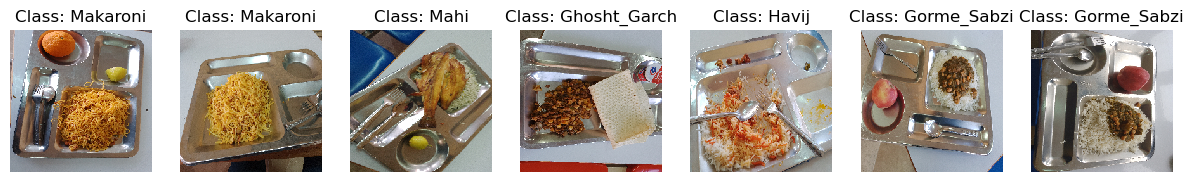

In [4]:
batch = val_generator.next()
images, _ = batch

predictions = model.predict(images)

class_names = val_generator.class_indices
class_names = {v: k for k, v in class_names.items()}


num_images_to_display = 7

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5)) 

for i in range(num_images_to_display):
    axes[i].imshow(images[i], interpolation='nearest')  
    axes[i].set_title(f"Class: {class_names[np.argmax(predictions[i])]}")
    axes[i].axis('off')

plt.show()

1/1 [==============================] - 0s 205ms/step


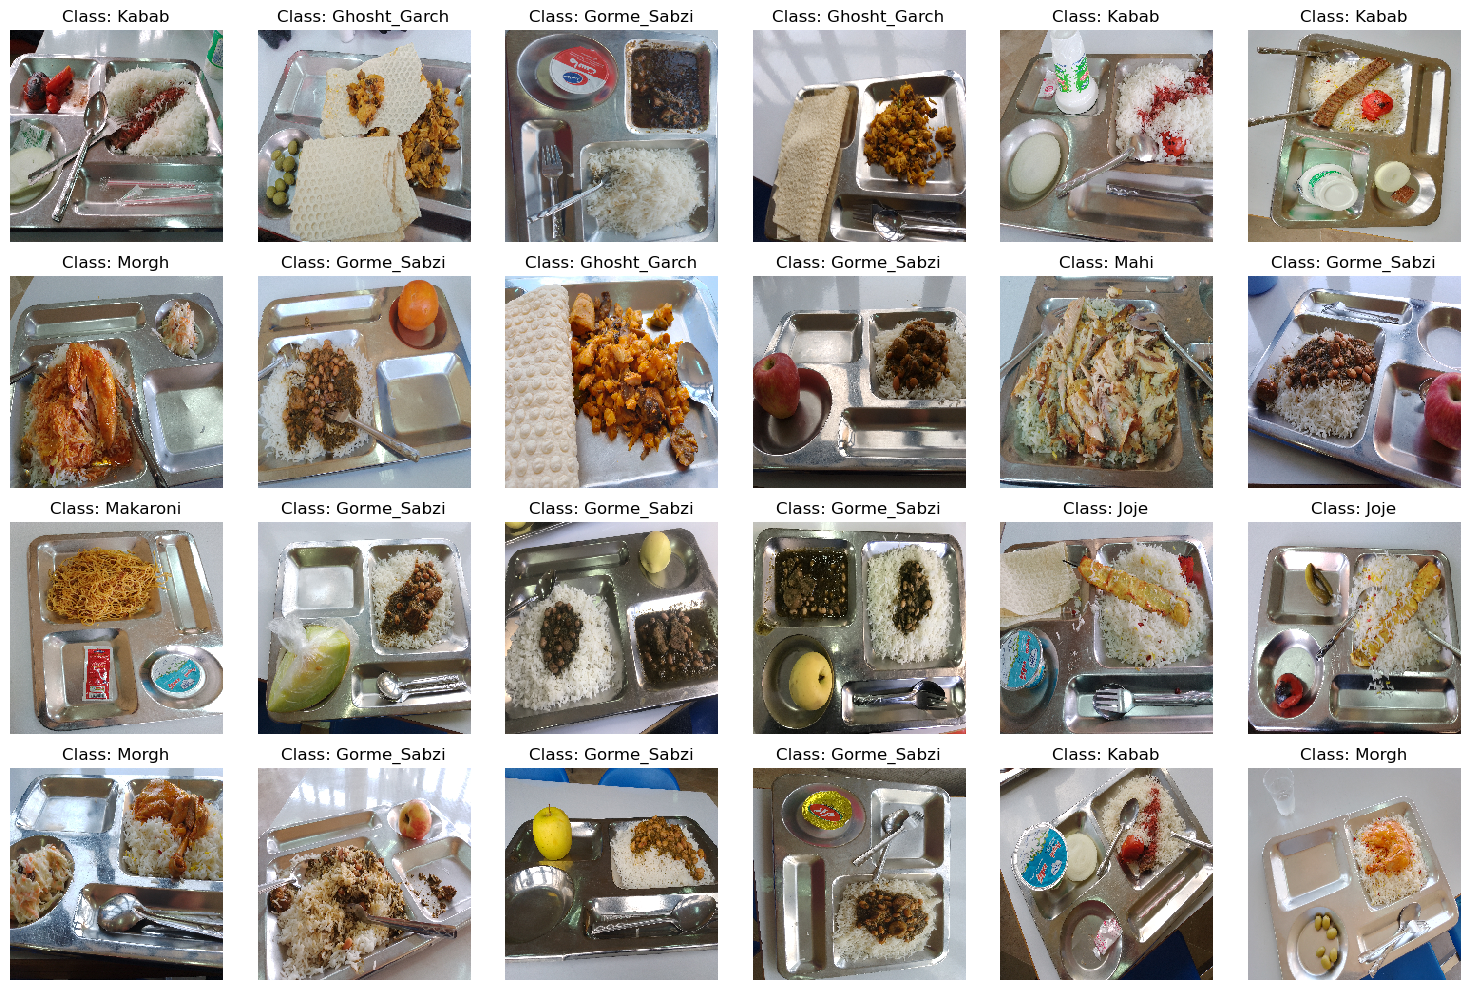

In [5]:
batch = train_generator.next()
images, labels = batch
predictions = model.predict(images)


fig, axes = plt.subplots(4, 6, figsize=(15, 10))  

for i in range(4):
    for j in range(6):
        index = i * 6 + j
        axes[i, j].imshow(images[index], interpolation='nearest')
        axes[i, j].set_title(f"Class: {class_names[np.argmax(predictions[index])]}")
        axes[i, j].axis('off') 

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.preprocessing import image



img = image.load_img('/Users/parsa/Downloads/IMG_2075.JPG', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)/255.0


predictions = model.predict(img_array)

predicted_class = class_names[np.argmax(predictions[0])]
confidence = predictions[0][np.argmax(predictions[0])]

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2%}")

1/1 [==============================] - 0s 387ms/step
Predicted Class: Ghosht_Garch
Confidence: 93.91%


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 9)                 2